# Stock analysis

## Import

Libraries

In [1]:
from utils.init import *

from utils.analyse_price import *
from utils.analyse_fundementals import *
from utils.data import *
from utils.params import *
from utils.pdf import *

In [2]:
TICKER = 'TYR'
COUNTRY = 'AU'
first_end_of_quarter = '2020-06'
last_end_of_quarter = '2024-06'
historical_prices_dict = {}

## Get data

Run data

same_industry_500


,ASX code,Market Cap,weight
1660,SQ2,5.372542e+10,0.930866
1171,MP1,1.175221e+09,0.020362
817,GTK,1.038008e+09,0.017985
695,FCL,4.888719e+08,0.008470
1461,QOR,4.782765e+08,0.008287
1616,SKO,3.295853e+08,0.005711
724,FND,2.454701e+08,0.004253
568,DSE,2.346664e+08,0.004066


,ASX code,Market Cap ($bn)
1800,TYR,0.47


0.01


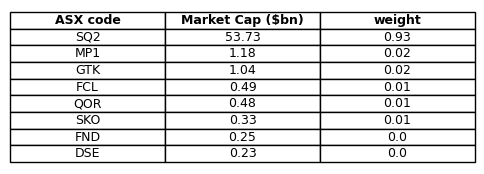

$SQ2.AX: possibly delisted; no price data found  (1d 2019-06-01 -> 2019-12-31) (Yahoo error = "Data doesn't exist for startDate = 1559311200, endDate = 1577710800")
$DSE.AX: possibly delisted; no price data found  (1d 2019-06-01 -> 2019-12-31) (Yahoo error = "Data doesn't exist for startDate = 1559311200, endDate = 1577710800")
$SQ2.AX: possibly delisted; no price data found  (1d 2020-01-01 -> 2020-12-31) (Yahoo error = "Data doesn't exist for startDate = 1577797200, endDate = 1609333200")
$DSE.AX: possibly delisted; no price data found  (1d 2020-01-01 -> 2020-12-31) (Yahoo error = "Data doesn't exist for startDate = 1577797200, endDate = 1609333200")
$SQ2.AX: possibly delisted; no price data found  (1d 2021-01-01 -> 2021-12-31) (Yahoo error = "Data doesn't exist for startDate = 1609419600, endDate = 1640869200")
$DSE.AX: possibly delisted; no price data found  (1d 2021-01-01 -> 2021-12-31) (Yahoo error = "Data doesn't exist for startDate = 1609419600, endDate = 1640869200")
$DSE.AX: p

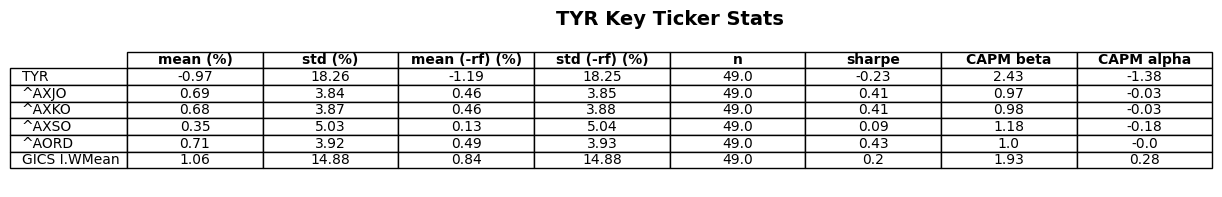

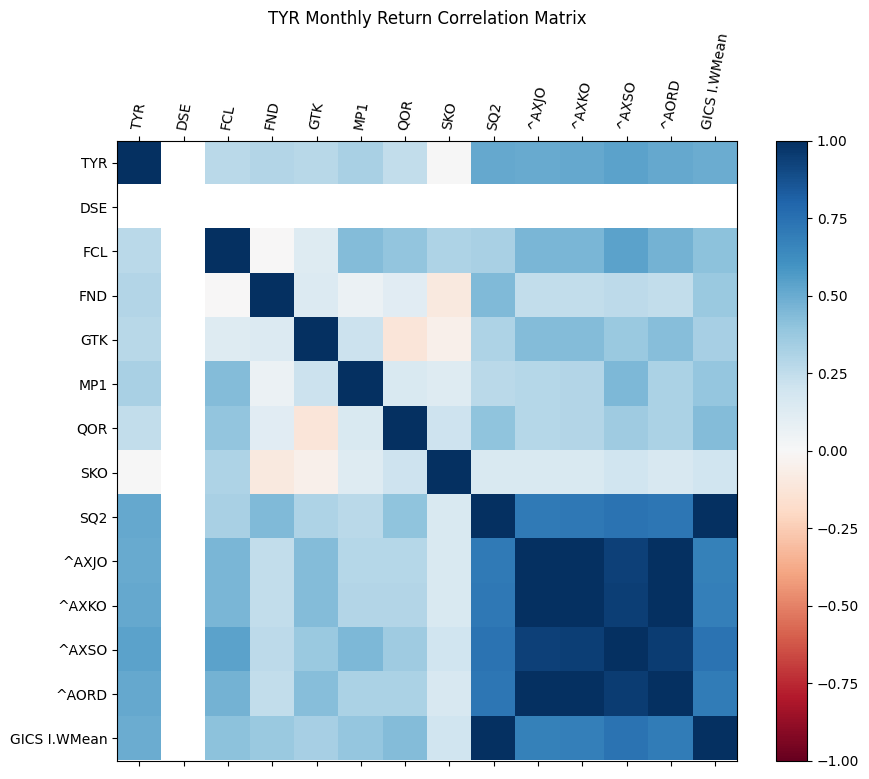

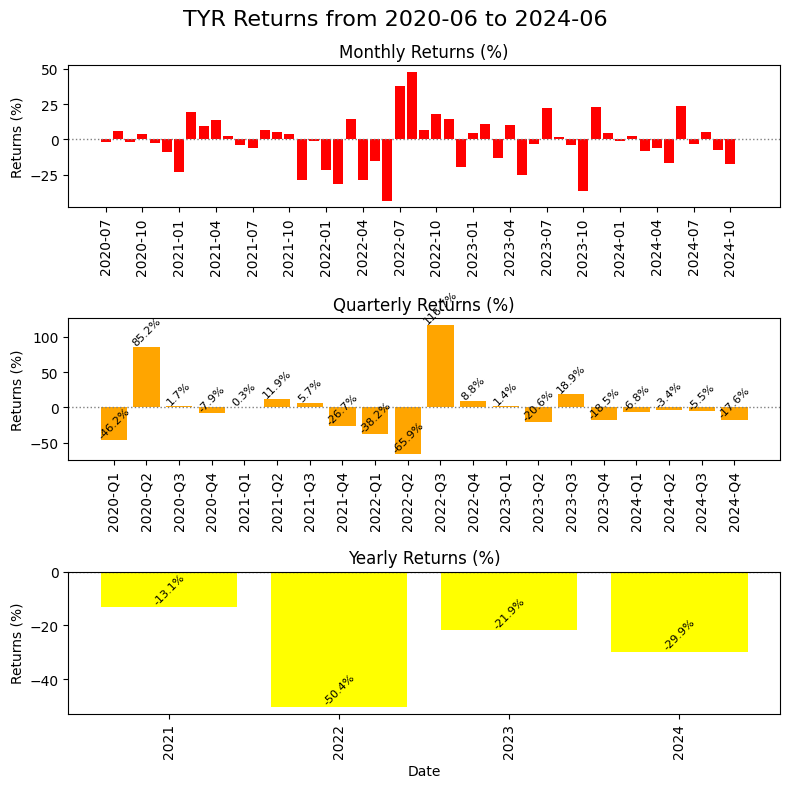

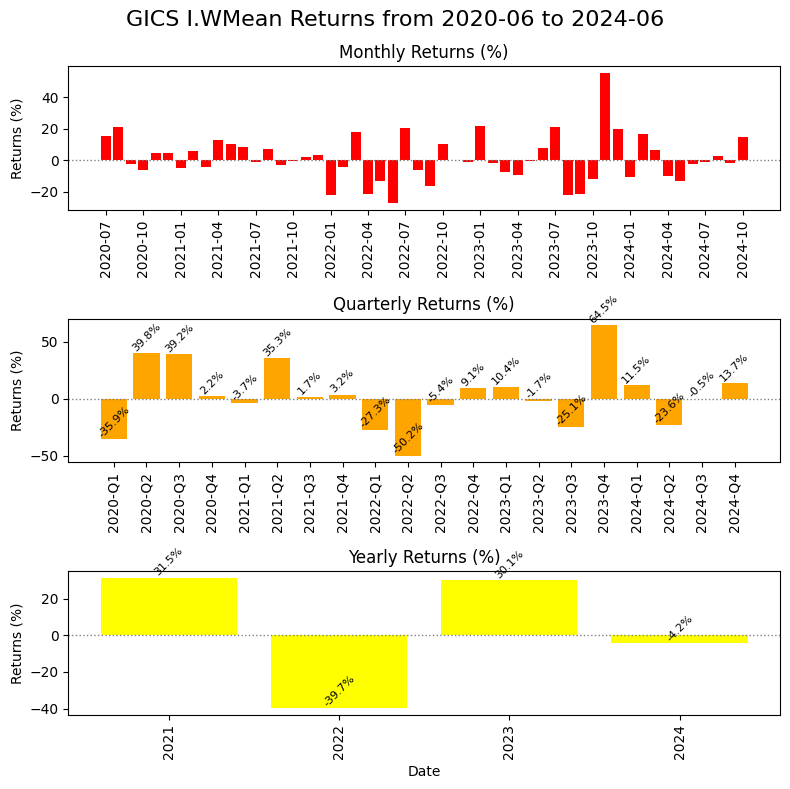

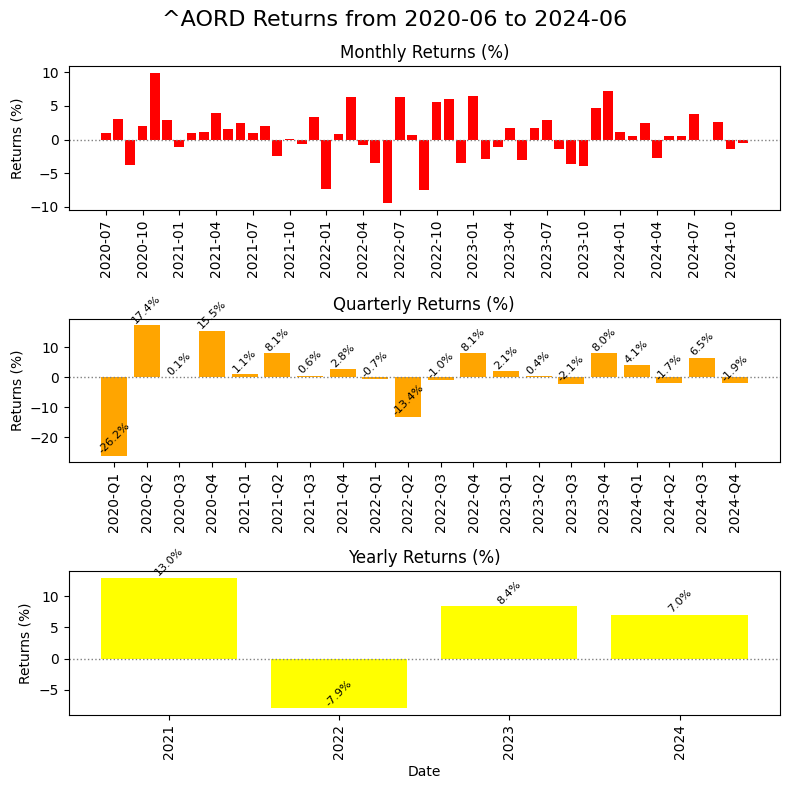

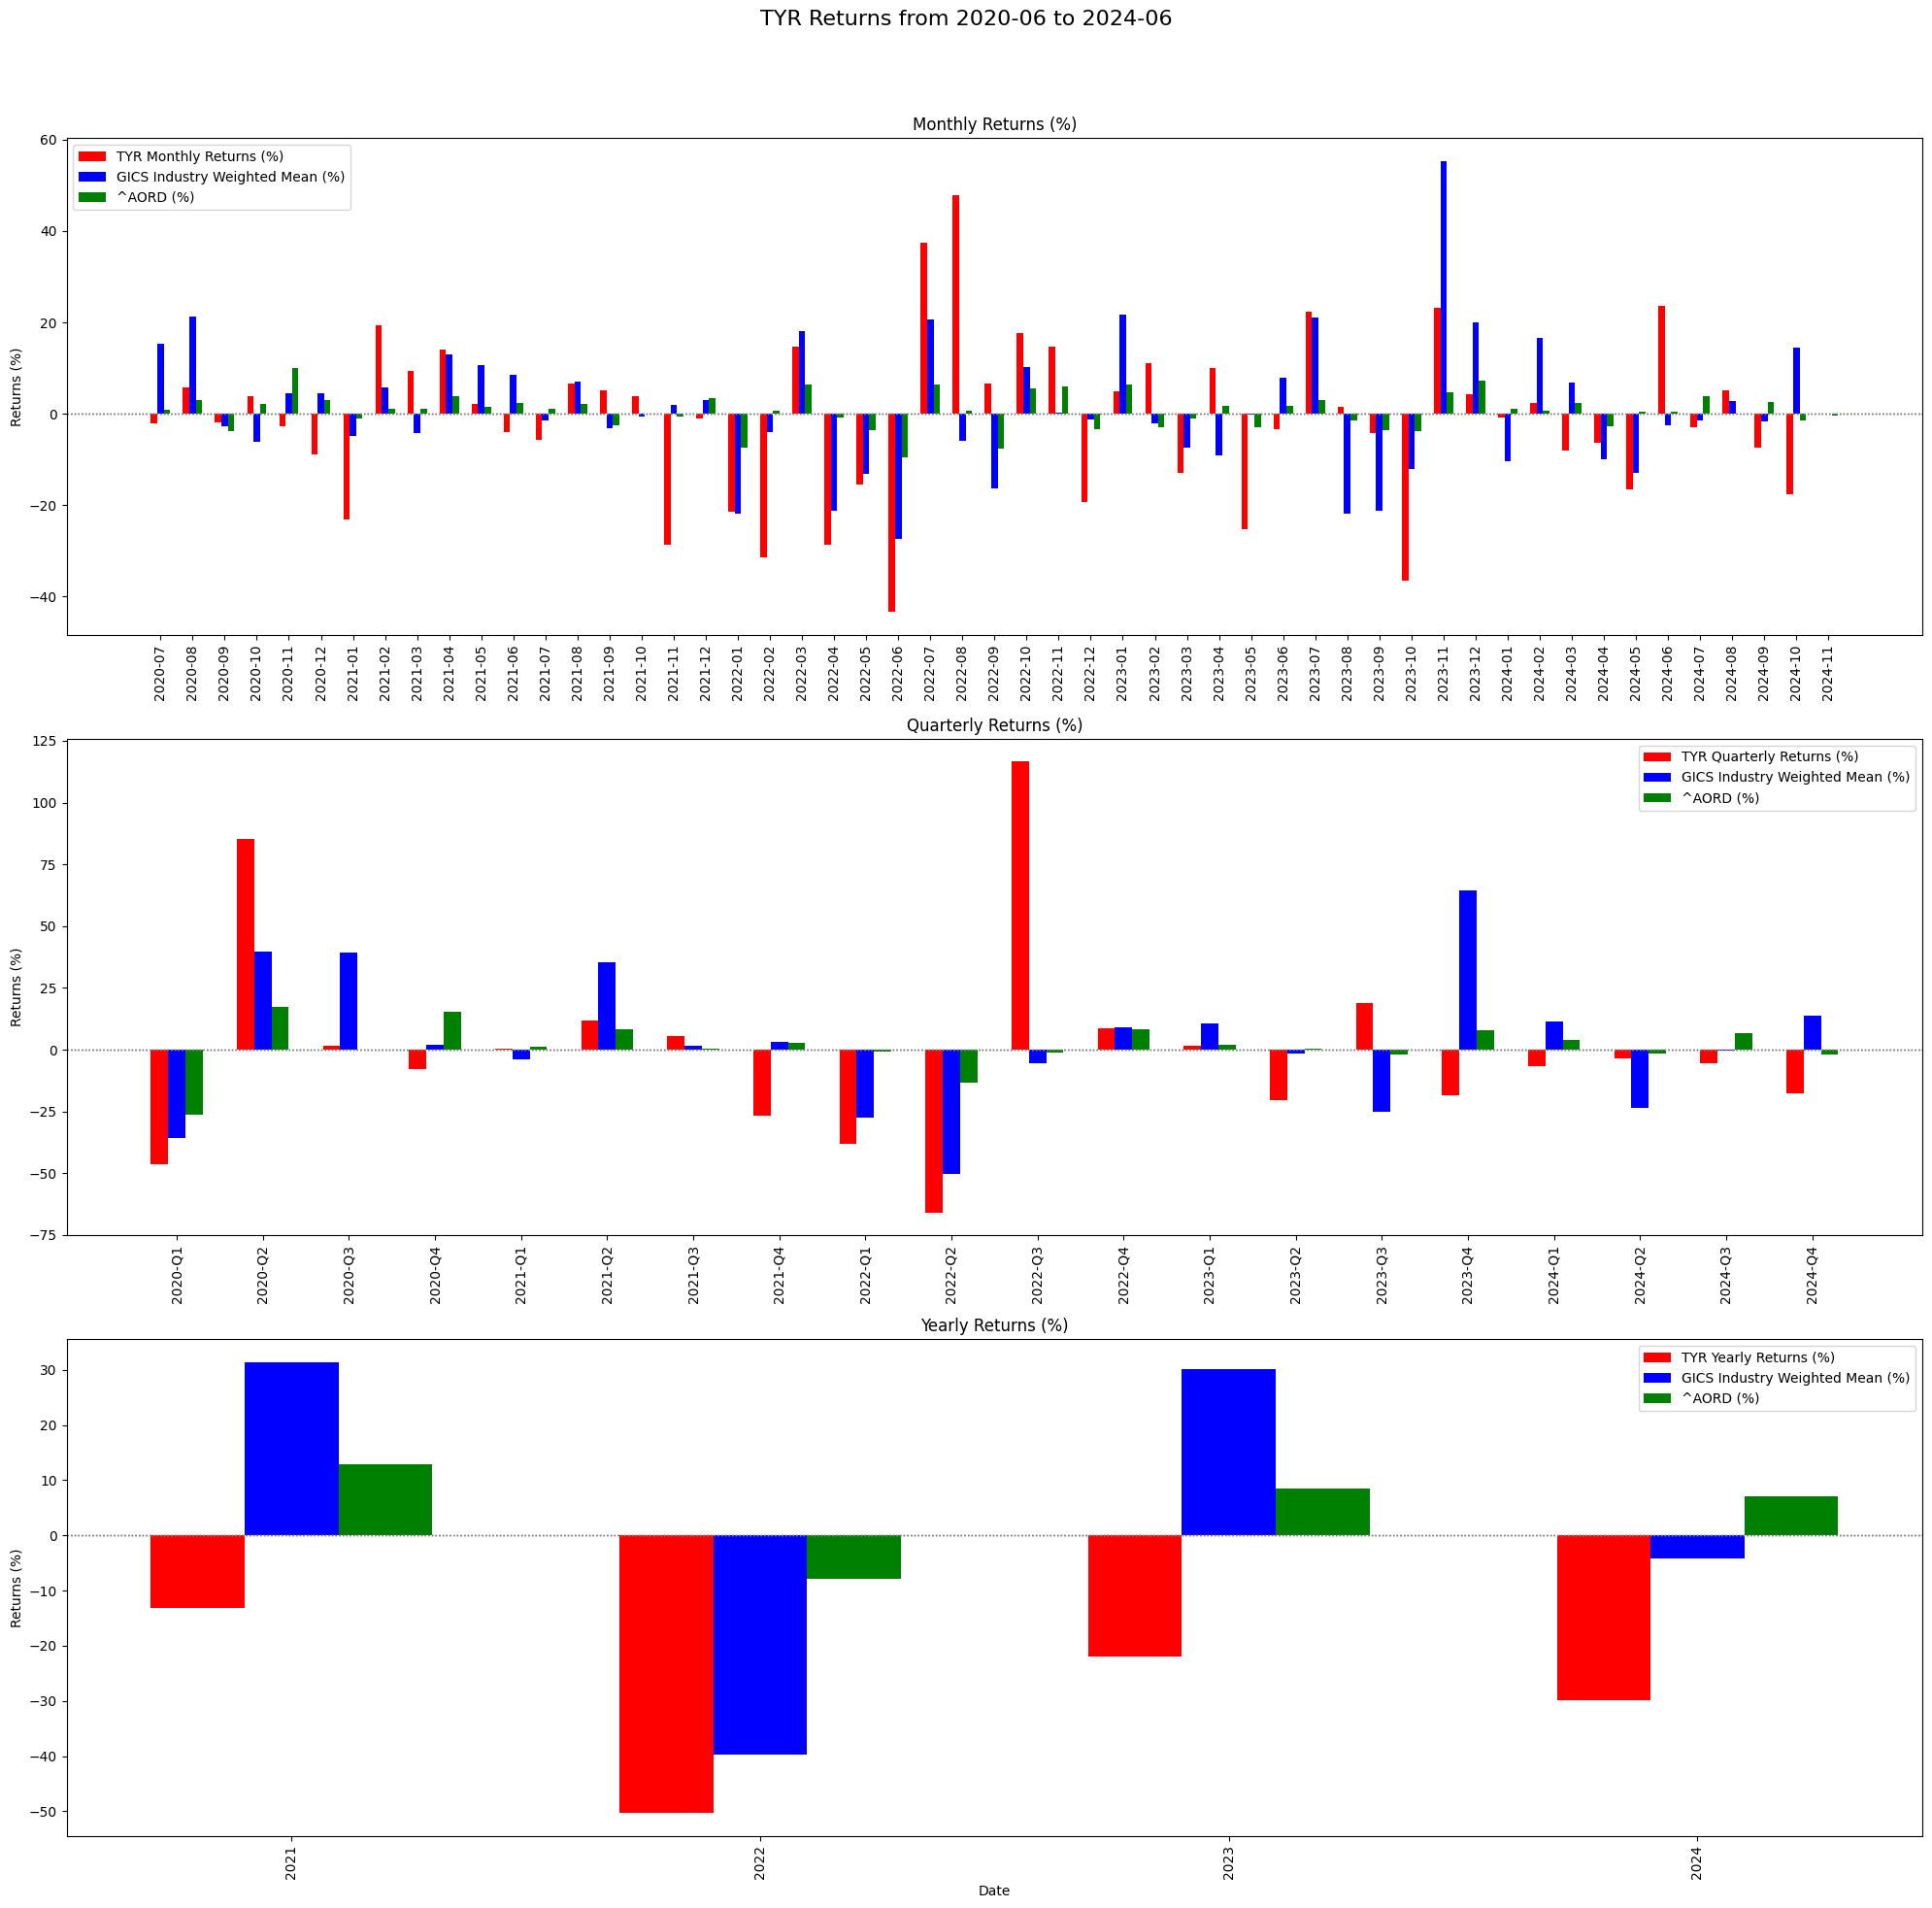

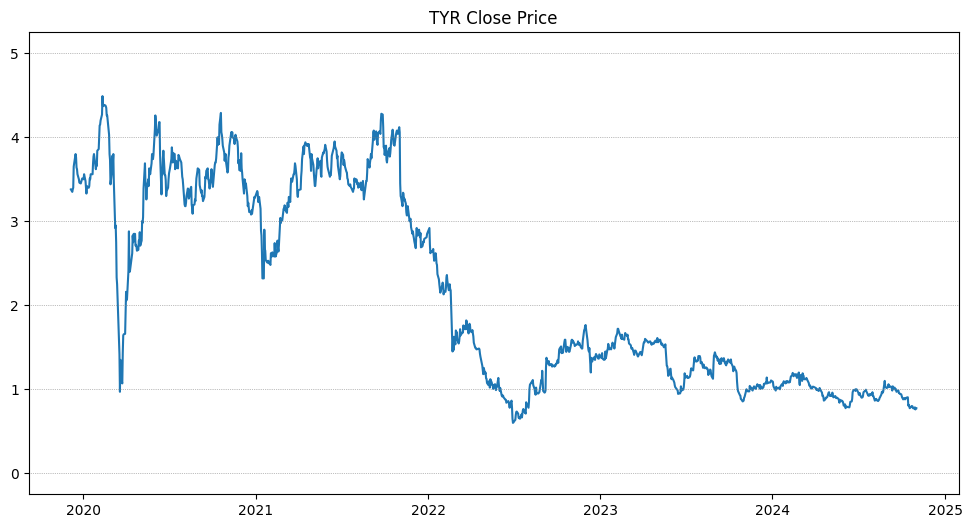

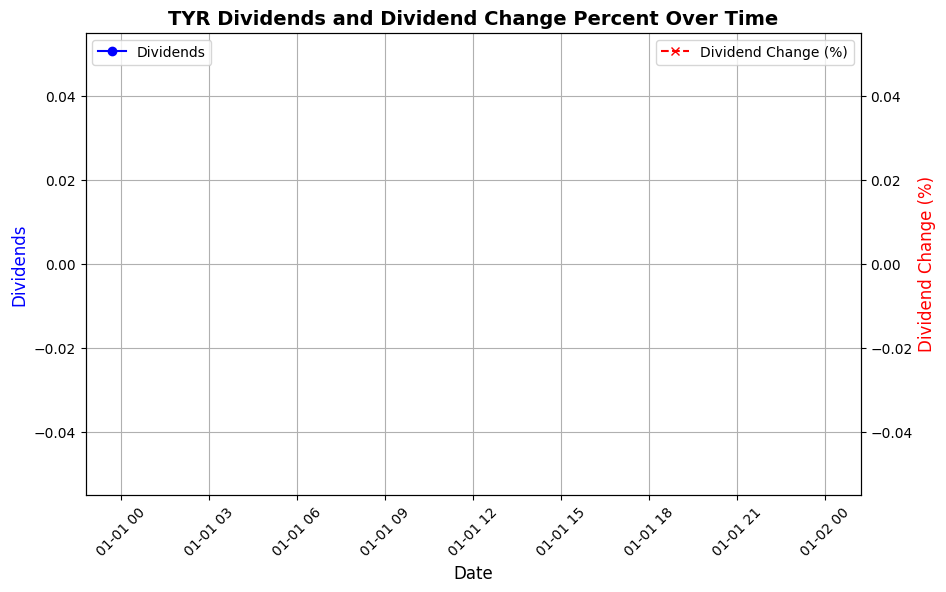

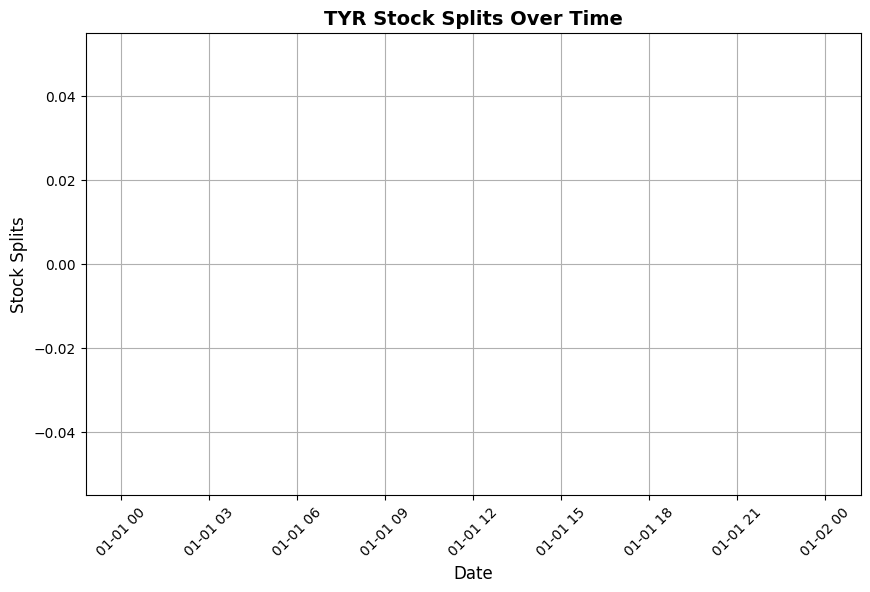

In [3]:
# read in data
index_tickers_list = get_index_tickers_list(COUNTRY)
interest_rate_df_dict = get_interest_rate(COUNTRY)

comparable_tickers = {'type': {}, 'list': []}
if COUNTRY == 'AU':
    asx_companies_directory_df = get_asx_companies_directory()
    asx_gics_df = get_asx_gics()

    # get same gics tickers

    AU_top_list_dict = get_top_ASX_companies_list(asx_companies_directory_df)
    ASX_ticker_gics_dict = get_ASX_ticker_gics(TICKER, asx_gics_df)
    same_gics_ASX_tickers_dict = get_same_gics_ASX_tickers(asx_gics_df,
                                                           ASX_ticker_gics_dict, AU_top_list_dict)
    comparable_ASX_tickers_dict = get_comparable_ASX_tickers(
        TICKER, same_gics_ASX_tickers_dict)

    print(comparable_ASX_tickers_dict['type'])

    same_industry_ASX_tickers_mcap_df = get_same_gics_ASX_MCap_weights(TICKER,
                                                                       asx_companies_directory_df, comparable_ASX_tickers_dict)

    # market value and weight
    same_industry_tickers_mcap_df = get_same_industry_tickers_mcap(
        same_industry_ASX_tickers_mcap_df)
    display(same_industry_tickers_mcap_df)

    ticker_mv_df = get_AU_ticker_mv_df(asx_companies_directory_df, TICKER)
    display(ticker_mv_df)

    ticker_proportion_of_market = get_AU_ticker_proportion_of_market(
        ticker_mv_df, same_industry_tickers_mcap_df)
    print(round(ticker_proportion_of_market, 2))

    plot_gics_mcap_weights(TICKER, same_industry_tickers_mcap_df)

    same_gics_industry_weight_dict = get_same_AU_gics_industry_weight_dict(
        same_industry_tickers_mcap_df)

# get historic prices
analysis_needed_ticker_list = get_analysis_needed_ticker_list(
    TICKER, index_tickers_list, comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers)
historical_prices_dict = get_historical_prices_for_interested_list(
    analysis_needed_ticker_list, index_tickers_list, historical_prices_dict, COUNTRY)

# get historical returns
monthly_returns_df_dict = {}
for ticker, price_df in historical_prices_dict.items():
    monthly_returns_df_dict[ticker] = get_return(
        price_df, interest_rate_df_dict['monthly'], 'M')

quarterly_returns_df_dict = {}
for ticker, price_df in historical_prices_dict.items():
    quarterly_returns_df_dict[ticker] = get_return(
        price_df, interest_rate_df_dict['quarterly'], 'Q')

yearly_returns_df_dict = {}
for ticker, price_df in historical_prices_dict.items():
    yearly_returns_df_dict[ticker] = get_return(
        price_df, interest_rate_df_dict['annualy'], 'Y')

# get GICS industry weighted returns
monthly_returns_df_dict = get_gics_industry_weighted_mean(
    monthly_returns_df_dict, TICKER, analysis_needed_ticker_list, same_gics_industry_weight_dict if COUNTRY == 'AU' else None,
    index_tickers_list, 'M', comparable_tickers=comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers)
quarterly_returns_df_dict = get_gics_industry_weighted_mean(
    quarterly_returns_df_dict, TICKER, analysis_needed_ticker_list, same_gics_industry_weight_dict if COUNTRY == 'AU' else None,
    index_tickers_list, 'Q', comparable_tickers=comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers)
yearly_returns_df_dict = get_gics_industry_weighted_mean(
    yearly_returns_df_dict, TICKER, analysis_needed_ticker_list, same_gics_industry_weight_dict if COUNTRY == 'AU' else None,
    index_tickers_list, 'Y', comparable_tickers=comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers)

# get stats based on returns
stats_df = get_monthly_stats_for_all_tickers(
    monthly_returns_df_dict, comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers, index_tickers_list, same_industry_ASX_tickers_mcap_df if TICKER == 'AU' else None, TICKER, first_end_of_quarter, last_end_of_quarter, COUNTRY)
plot_key_ticker_stats_table(
    stats_df, TICKER, comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers, index_tickers_list)

# correlation chart
correlation_df, period_of_interest_return_df = historical_corr(
    monthly_returns_df_dict, first_end_of_quarter, last_end_of_quarter)
plot_correlation(correlation_df, ticker=TICKER)

# plot returns
# interested ticker
plot_returns(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                'quarterly_returns_df_dict': quarterly_returns_df_dict,
                'yearly_returns_df_dict': yearly_returns_df_dict, 'ticker': TICKER,
                'first_end_of_quarter': first_end_of_quarter,
                'last_end_of_quarter': last_end_of_quarter})

if COUNTRY == 'AU' and len(comparable_ASX_tickers_dict['list']) > 0:
    plot_returns(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                    'quarterly_returns_df_dict': quarterly_returns_df_dict,
                    'yearly_returns_df_dict': yearly_returns_df_dict,
                    'ticker': 'GICS I.WMean' if 'industry' in comparable_ASX_tickers_dict['type'] else 'GICS S.WMean',
                    'first_end_of_quarter': first_end_of_quarter,
                    'last_end_of_quarter': last_end_of_quarter,
                    'underlying_ticker': TICKER})

plot_returns(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                'quarterly_returns_df_dict': quarterly_returns_df_dict,
                'yearly_returns_df_dict': yearly_returns_df_dict, 'ticker': '^AORD' if COUNTRY == 'AU' else '^GSPC',
                'first_end_of_quarter': first_end_of_quarter,
                'last_end_of_quarter': last_end_of_quarter})

plot_returns_comparative(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                            'quarterly_returns_df_dict': quarterly_returns_df_dict,
                            'yearly_returns_df_dict': yearly_returns_df_dict, 'TICKER': TICKER,
                            'first_end_of_quarter': first_end_of_quarter,
                            'last_end_of_quarter': last_end_of_quarter,
                            'comparable_tickers': comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers, 'country': COUNTRY}
                         )

# price movement
plot_close_price_with_dollar_lines(TICKER, historical_prices_dict)

# dividends
historical_dividends = get_historical_dividends(
    TICKER, historical_prices_dict, COUNTRY)
plot_dividends(TICKER, historical_dividends, historical_prices_dict, COUNTRY)

# historical splits
historical_splits = get_historical_splits(
    TICKER, historical_prices_dict, COUNTRY)
plot_splits_over_time(TICKER, historical_prices_dict, COUNTRY)

# Fundementals

Income Tax Paid Supplemental Data not found for ticker TYR: 'Income Tax Paid Supplemental Data'
Missing data for Net Profit for ticker TYR: 'Income Tax Paid Supplemental Data'


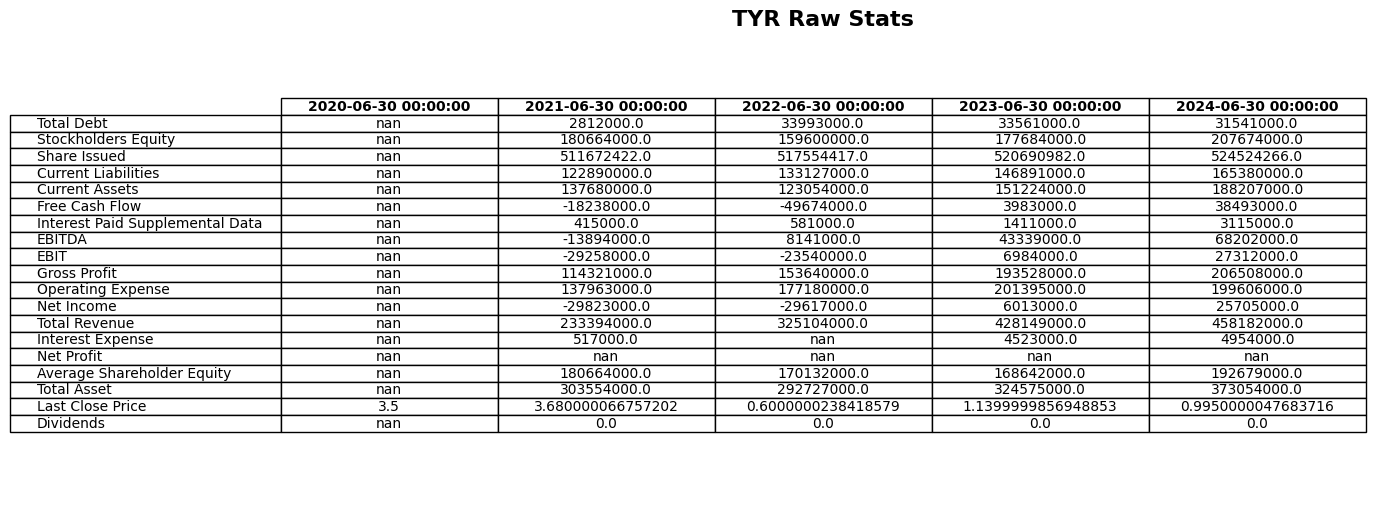

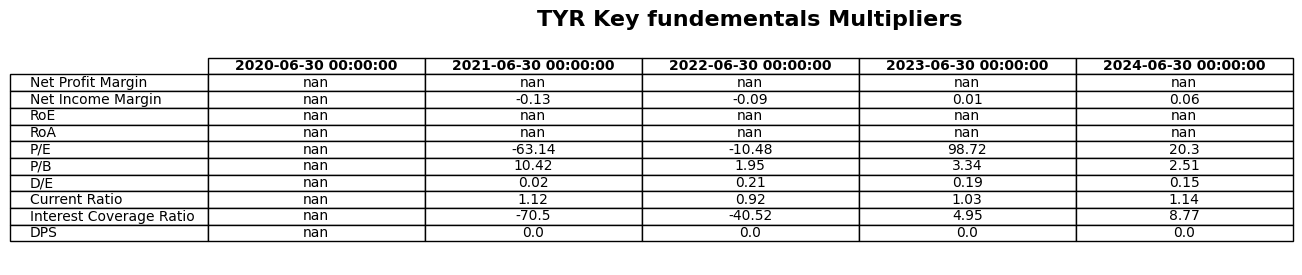

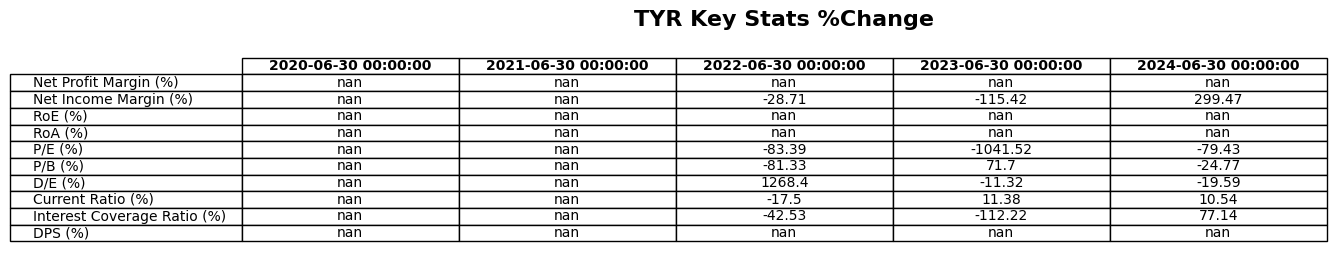


 DSE
Interest Paid Supplemental Data not found for ticker DSE: 'Interest Paid Supplemental Data'
Income Tax Paid Supplemental Data not found for ticker DSE: 'Income Tax Paid Supplemental Data'
Missing data for Net Profit for ticker DSE: 'Interest Paid Supplemental Data'
Missing data for Interest Coverage Ratio for ticker DSE: 'Interest Paid Supplemental Data'

 FCL
Interest Paid Supplemental Data not found for ticker FCL: 'Interest Paid Supplemental Data'
Income Tax Paid Supplemental Data not found for ticker FCL: 'Income Tax Paid Supplemental Data'
Missing data for Net Profit for ticker FCL: 'Interest Paid Supplemental Data'
Missing data for Interest Coverage Ratio for ticker FCL: 'Interest Paid Supplemental Data'

 FND

 GTK

 MP1

 QOR

 SKO

 SQ2
Interest Paid Supplemental Data not found for ticker SQ2: 'Interest Paid Supplemental Data'
Income Tax Paid Supplemental Data not found for ticker SQ2: 'Income Tax Paid Supplemental Data'
Missing data for Net Profit for ticker SQ2: 'Inter

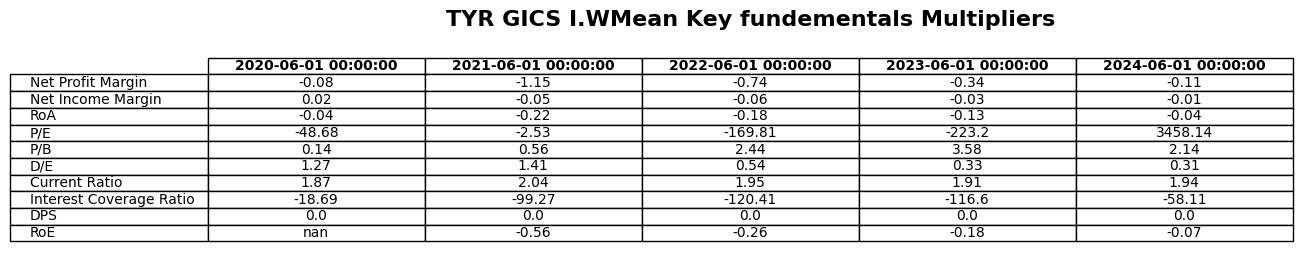

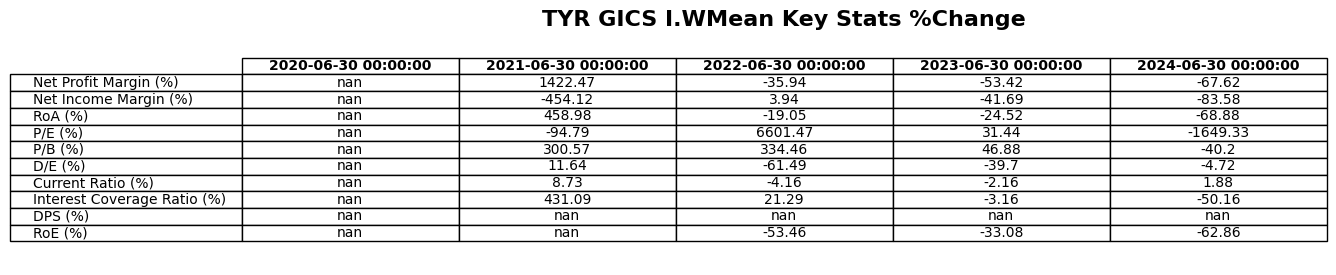

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


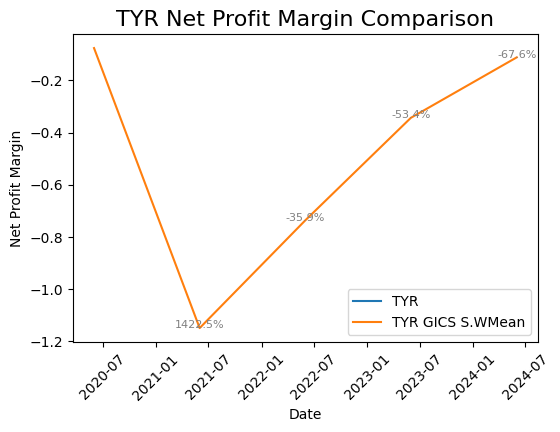

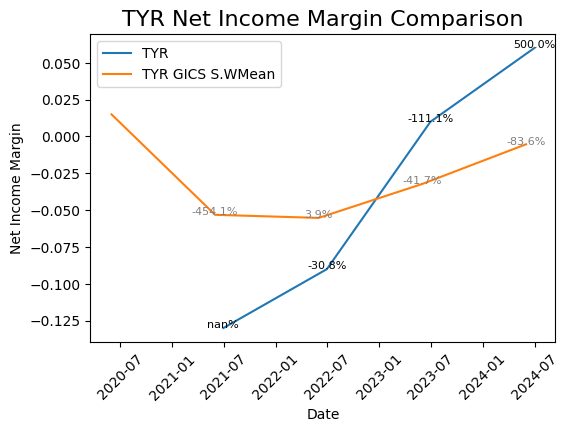

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


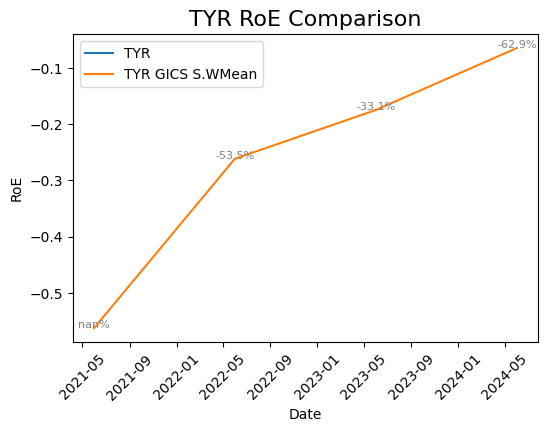

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


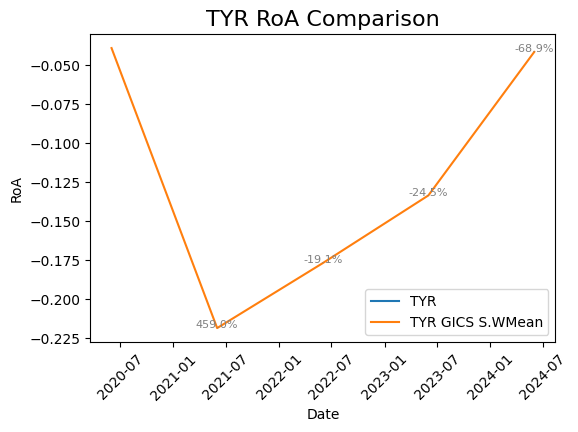

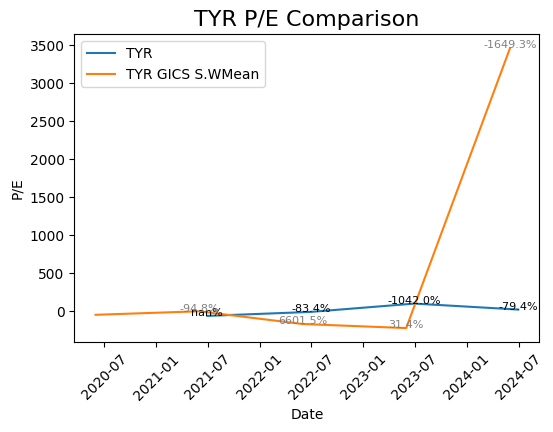

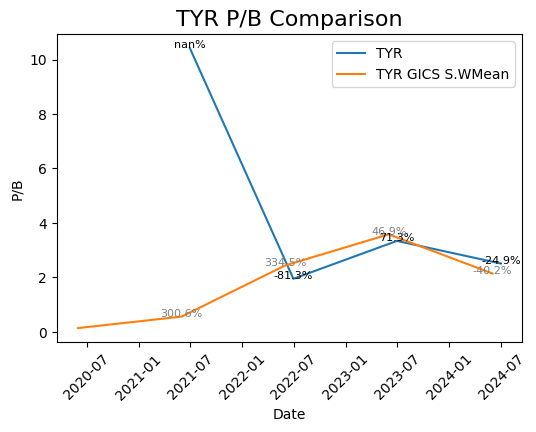

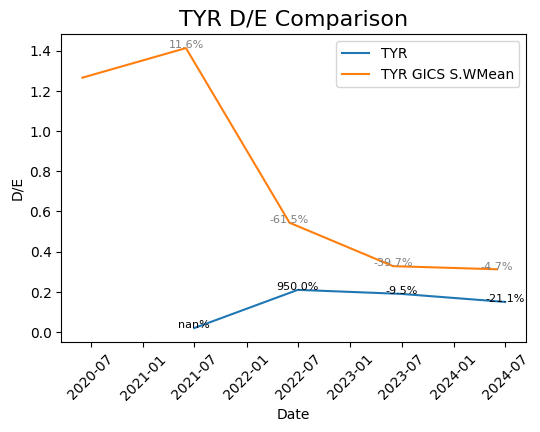

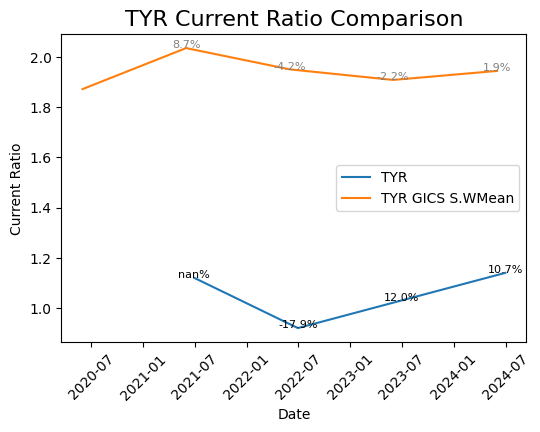

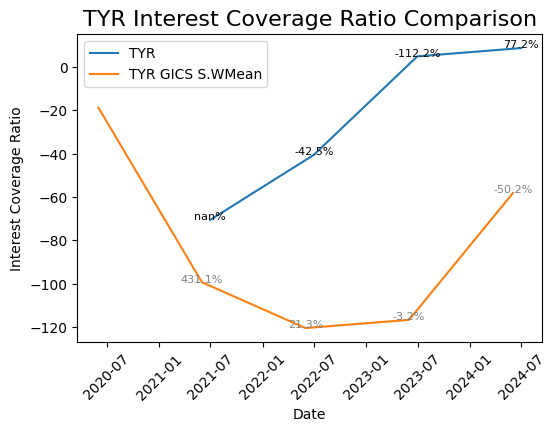

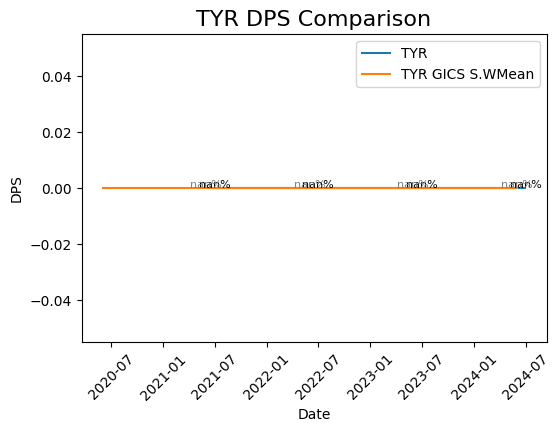

In [4]:
got_fundementals = False

if not (COUNTRY == 'AU' and ASX_ticker_gics_dict['Sector'] == 'Unknown' and ASX_ticker_gics_dict['Industry'] == 'Unknown'):

    got_fundementals = True

    # get fundementals for ticker of interest
    interested_ticker_raw_fundementals_stats, interested_ticker_key_interested_fundementals_stats, interested_ticker_key_interested_fundementals_stats_pct_change, object = get_fundementals_dfs(
        first_end_of_quarter, historical_prices_dict, TICKER, COUNTRY)
    # create tables for fundementals for ticker of interest
    plot_raw_fundementals_stats_table(
        interested_ticker_raw_fundementals_stats, TICKER)
    plot_key_fundementals_multipliers_table(
        interested_ticker_key_interested_fundementals_stats, TICKER)
    plot_key_fundementals_multipliers_pct_change_table(
        interested_ticker_key_interested_fundementals_stats_pct_change, TICKER)

    # get fundementals for comparable tickers
    if COUNTRY == 'AU':

        # get raw fundementals stats for comparable tickers
        raw_fundementals_stats_dict, object_dict = get_raw_fundementals_stats(
            comparable_ASX_tickers_dict, first_end_of_quarter, historical_prices_dict, COUNTRY)

        # aggregate and integrate the fundementals stats for comparable tickers
        agg_interpolated_fundementals_stats_df_dict = get_agg_interpolated_fundementals_stats(
            raw_fundementals_stats_dict, interested_ticker_key_interested_fundementals_stats_pct_change)

        # get key interested fundemental stats from the interpolated fundementals for comparable tickers
        key_interested_fundementals_stats_dict, key_interested_fundementals_stats_pct_change_dict = get_key_interested_fundementals_stats_for_comparable(
            agg_interpolated_fundementals_stats_df_dict, object_dict, first_end_of_quarter, historical_prices_dict)

        # get weighted average of the key interested fundementals stats for the GICS industry
        weighted_GICS_key_interested_fundementals_stats = get_weighted_fundementals(
            key_interested_fundementals_stats_dict, same_gics_industry_weight_dict)
        weighted_GICS_key_interested_fundementals_stats.index = weighted_GICS_key_interested_fundementals_stats.index

        plot_key_fundementals_multipliers_table(
            weighted_GICS_key_interested_fundementals_stats.astype(float).round(2),  f'{TICKER} GICS I.WMean' if 'industry' in comparable_ASX_tickers_dict['type'] else f'{TICKER} GICS S.WMean')

        # get percentage change for key interested fundemental stats for the weighted average of the GICS industry
        weighted_GICS_key_interested_fundementals_stats_pct_change = get_key_interested_fundementals_stat_pct_change(
            weighted_GICS_key_interested_fundementals_stats)
        weighted_GICS_key_interested_fundementals_stats_pct_change.index = interested_ticker_key_interested_fundementals_stats_pct_change.index

        plot_key_fundementals_multipliers_pct_change_table(
            weighted_GICS_key_interested_fundementals_stats_pct_change, f'{TICKER} GICS I.WMean' if 'industry' in comparable_ASX_tickers_dict['type'] else f'{TICKER} GICS S.WMean')

    else:
        weighted_GICS_key_interested_fundementals_stats = pd.DataFrame()

    # plot the comparison of key interested fundementals for the ticker of interest and the weighted average of the GICS industry
    plot_key_fundamentals_multipliers(
        interested_ticker_key_interested_fundementals_stats, weighted_GICS_key_interested_fundementals_stats, TICKER, {})

PDF

In [5]:
create_pdf(**{
    'ASX_ticker_gics_dict': ASX_ticker_gics_dict,
    'comparable_ASX_tickers_dict': comparable_ASX_tickers_dict,
    'ticker_mv_df': ticker_mv_df,
    'same_industry_tickers_mcap_df': same_industry_tickers_mcap_df,
    'got_fundementals': got_fundementals,
    'TICKER': TICKER,
    'COUNTRY': COUNTRY,
})